In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## PCA

In [2]:
wine=pd.read_csv("E:\\itsstudytym\\assignments\\PCA\\wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

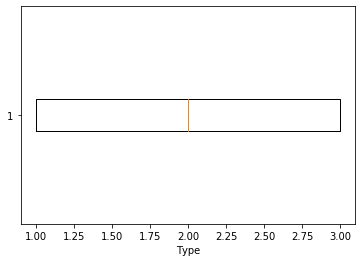

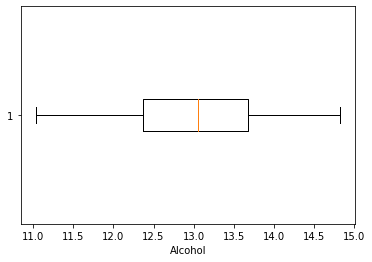

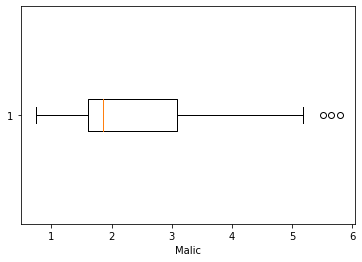

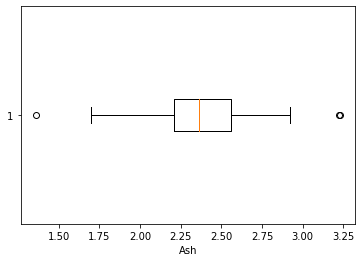

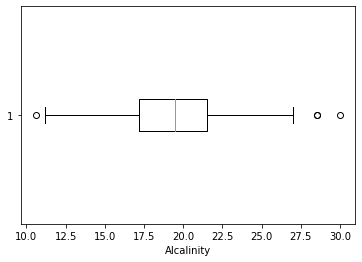

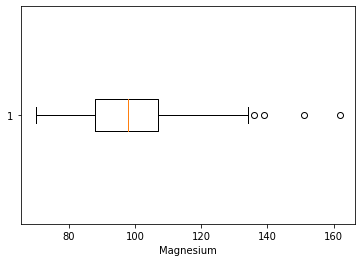

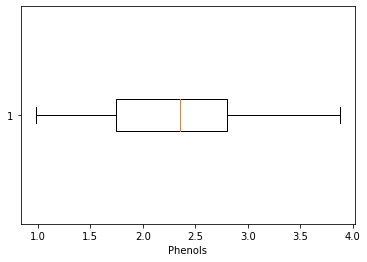

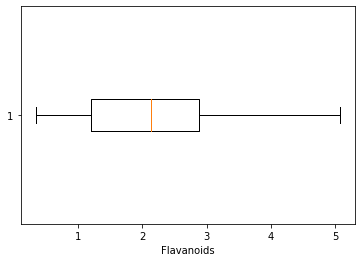

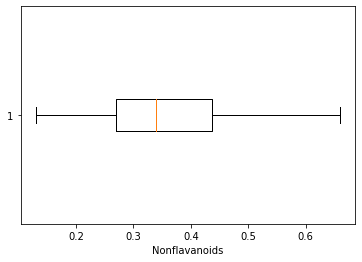

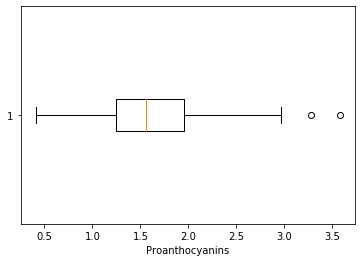

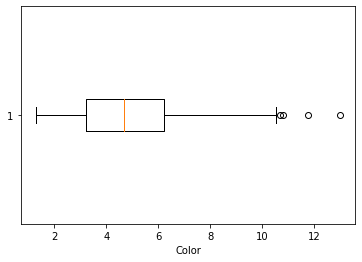

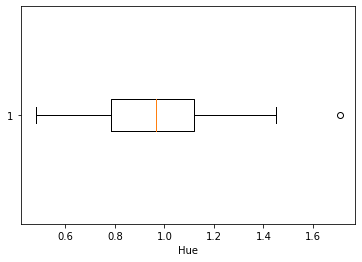

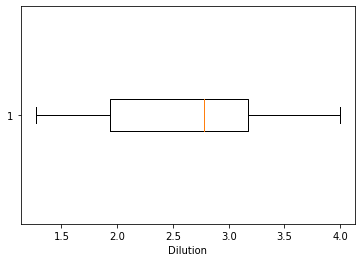

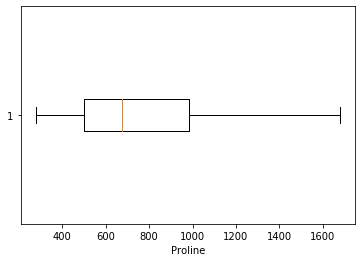

In [4]:
for i in wine.columns:
    plt.boxplot(i,data=wine,vert=False)
    plt.xlabel(i)
    plt.show()

In [5]:
from scipy import stats

In [6]:
z=np.abs(stats.zscore(wine))
wine=wine[(z<3).all(axis=1)]
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scale=StandardScaler()

In [9]:
scale.fit(wine.iloc[:,1:])
wine.iloc[:,1:]=scale.transform(wine.iloc[:,1:])
wine.shape

(168, 14)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA()

In [12]:
pca.fit(wine.iloc[:,1:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca_wine=pca.transform(wine.iloc[:,1:])
pca_wine.shape

(168, 13)

In [14]:
wine.shape

(168, 14)

In [15]:
p_wine=pd.DataFrame(pca_wine)
p_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.480609,-1.568589,0.063511,-0.398207,0.632180,-0.340109,0.870778,-0.190590,0.649345,-1.054783,0.391797,0.600594,0.081761
1,2.388124,0.337494,-1.886458,-0.673319,0.024045,-1.110762,-0.026263,0.944847,-0.562310,0.002163,0.287765,0.305824,-0.083312
2,2.624506,-0.930060,1.223330,1.062186,-0.257078,0.613688,0.582069,-0.474195,-1.057237,-0.129377,0.119982,0.012930,-0.045891
3,3.894769,-2.695580,0.040986,0.671661,-0.023619,0.270974,-0.275297,0.908077,0.131758,-0.326258,-0.591882,-0.239935,0.343976
4,1.013285,-0.986126,2.412583,-0.385064,0.298921,-0.269678,0.701285,0.200216,0.431189,0.095620,0.387320,-0.099798,-0.042414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-3.316671,-2.279458,-0.361216,1.181588,-0.639221,-1.434621,0.229084,-0.136457,-0.106533,0.308173,-0.145750,0.088806,0.093374
164,-2.586142,-1.816071,0.239916,0.494881,0.112038,0.054522,-0.001119,-0.537710,0.002426,0.081891,-0.325314,-0.288314,0.289422
165,-2.592466,-3.012122,-1.112428,0.128451,0.932777,0.101491,0.963682,-0.257132,0.048425,0.064502,-0.744919,0.587048,0.025723
166,-2.301303,-2.507022,-0.664556,-0.703713,0.264969,1.046238,1.161133,0.140071,0.134008,-0.619254,-0.331118,0.338635,0.118719


## Clusters with first 3 components of PCA

In [16]:
wine1=p_wine.iloc[:,:3]
wine1.head()
wine1.shape

(168, 3)

In [17]:
wine1=pd.concat([wine1,wine['Type']],axis=1)
wine1.shape

(178, 4)

In [18]:
wine1.head()

,0,1,2,Type
0,3.480609,-1.568589,0.063511,1.0
1,2.388124,0.337494,-1.886458,1.0
2,2.624506,-0.930060,1.223330,1.0
3,3.894769,-2.695580,0.040986,1.0
4,1.013285,-0.986126,2.412583,1.0


In [20]:
wine1=pd.read_csv('wine.csv')

In [21]:
wine1.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
Type          0
dtype: int64

## Heirarchical Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [23]:
z=linkage(wine1,method='complete',metric='euclidean')

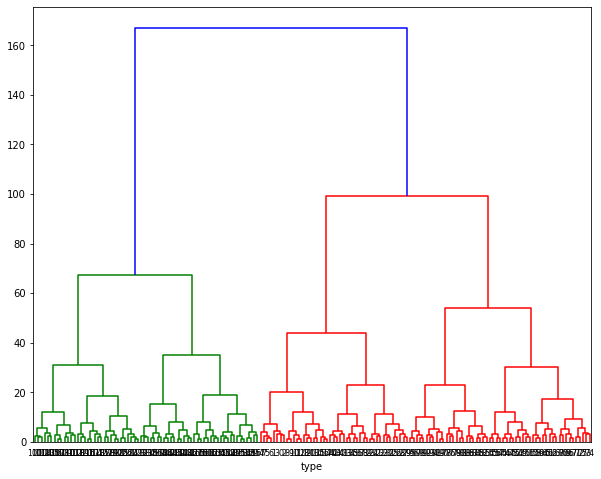

In [24]:
plt.figure(figsize=(10,8))
plt.xlabel('type')
sch.dendrogram(z,leaf_font_size=8,leaf_rotation=0)
plt.show()

In [39]:
h_clust=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(wine1)
h_clust.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
clust=pd.Series(h_clust.labels_)
wine1['Cluster']=clust
wine1.head()

,Unnamed: 0,0,1,2,Type,Cluster
0,0,3.480609,-1.568589,0.063511,1,2
1,1,2.388124,0.337494,-1.886458,1,2
2,2,2.624506,-0.930060,1.223330,1,2
3,3,3.894769,-2.695580,0.040986,1,2
4,4,1.013285,-0.986126,2.412583,1,2


## KMeans Clustering

In [41]:
wine1=wine1.drop('Cluster',axis=1)

In [25]:
from sklearn.cluster import KMeans

In [26]:
sse=[]
k=range(1,10)
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(wine1)
    sse.append(km.inertia_)
    
sse

[396722.643210341,
 99820.0159516994,
 44502.89333694647,
 25313.95816082799,
 16399.155683685378,
 11523.350432068983,
 8603.216527662156,
 6676.124657609185,
 5383.562720884267]

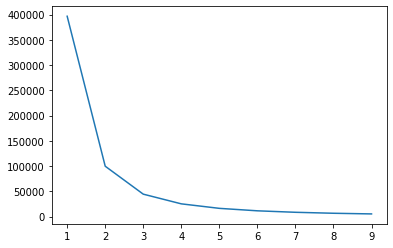

In [27]:
plt.plot(k,sse)

In [28]:
km=KMeans(n_clusters=3)

In [29]:
y_pred=km.fit_predict(wine1)

In [30]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
wine1['Cluster']=y_pred

In [32]:
wine1.head()

,Unnamed: 0,0,1,2,Type,Cluster
0,0,3.480609,-1.568589,0.063511,1,2
1,1,2.388124,0.337494,-1.886458,1,2
2,2,2.624506,-0.930060,1.223330,1,2
3,3,3.894769,-2.695580,0.040986,1,2
4,4,1.013285,-0.986126,2.412583,1,2


In [33]:
Wine1=wine1[wine1['Cluster']==0]
Wine2=wine1[wine1['Cluster']==1]
Wine3=wine1[wine1['Cluster']==2]

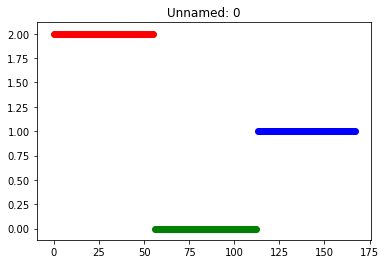

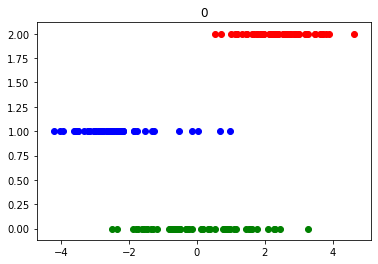

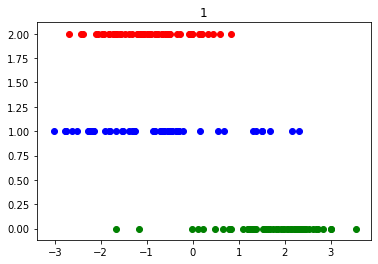

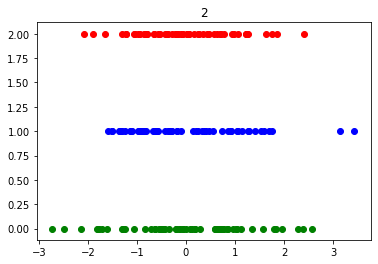

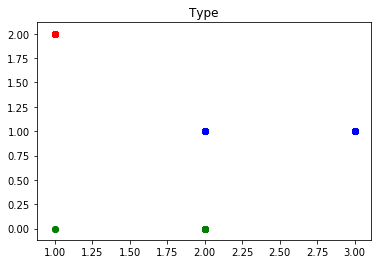

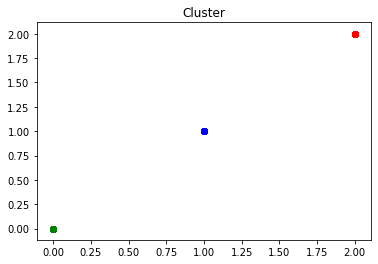

In [35]:
for feature in wine1:
    plt.scatter(Wine1[feature],Wine1['Cluster'],color='green')
    plt.scatter(Wine2[feature],Wine2['Cluster'],color='blue')
    plt.scatter(Wine3[feature],Wine3['Cluster'],color='red')
    plt.title(feature)
    plt.show()


## Clustering with whole Dataset

In [37]:
z=linkage(wine,method='complete',metric='euclidean')

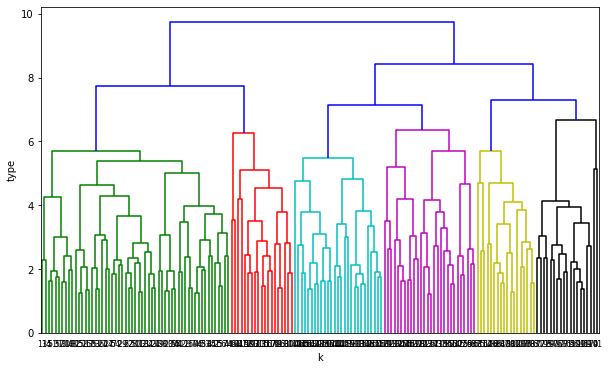

In [38]:
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('type')
sch.dendrogram(z,leaf_font_size=8,leaf_rotation=0)
plt.show()

In [42]:
h_clust=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(wine)
h_clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1,
       2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [43]:
clust=pd.Series(h_clust.labels_)
wine['Cluster']=clust
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,1.513539,-0.578842,0.250637,-1.209653,2.253466,0.840250,1.068668,-0.669081,1.395565,0.233962,0.403766,1.857453,0.980537,0.0
1,1,0.210929,-0.514888,-0.945351,-2.624711,0.097439,0.600640,0.763248,-0.830933,-0.517348,-0.329398,0.449249,1.127605,0.933414,0.0
2,1,0.160342,0.015009,1.240421,-0.244840,0.177292,0.840250,1.251920,-0.507230,2.380432,0.251846,0.358284,0.804788,1.357515,0.0
3,1,1.690593,-0.359574,0.539324,-0.823728,1.135526,2.517517,1.506437,-0.992784,1.187228,1.199721,-0.414920,1.197783,2.284254,0.0
4,1,0.261516,0.225141,2.065240,0.527010,1.534790,0.840250,0.691983,0.221100,0.505398,-0.356225,0.403766,0.467935,-0.056154,0.0


In [44]:
wine=wine.drop('Cluster',axis=1)

## KMeans on whole Dataset

In [45]:
sse=[]
k=range(1,10)
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(wine)
    sse.append(km.inertia_)
    
sse

[2288.2797619047624,
 1551.9119259923468,
 1136.3501543757168,
 1047.235286858428,
 985.8220199618684,
 937.4396361142783,
 888.9637419629108,
 841.6801879378697,
 810.616247360717]

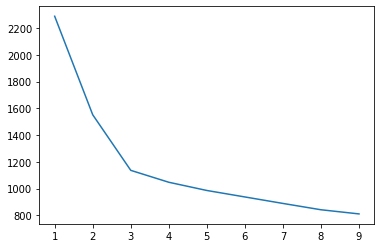

In [47]:
plt.plot(k,sse)

In [48]:
km=KMeans(n_clusters=3)

In [49]:
y_pred=km.fit_predict(wine)

In [50]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
wine['Cluster']=y_pred

In [56]:
WINE1=wine[wine['Cluster']==0]
WINE2=wine[wine['Cluster']==1]
WINE3=wine[wine['Cluster']==2]

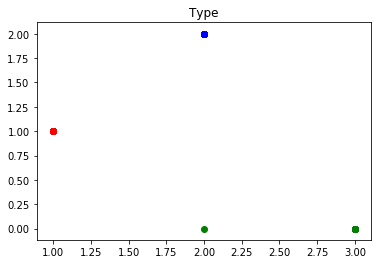

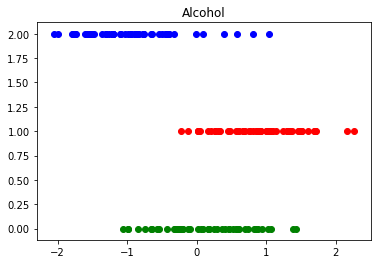

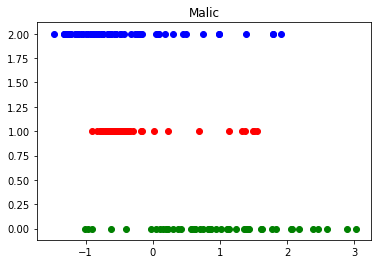

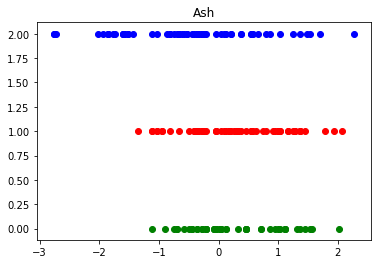

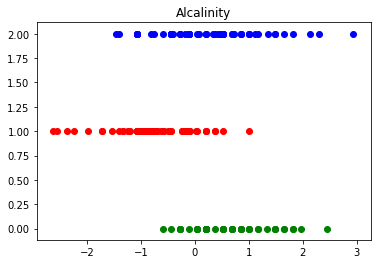

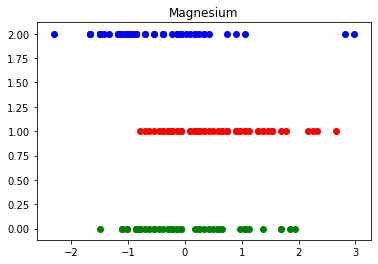

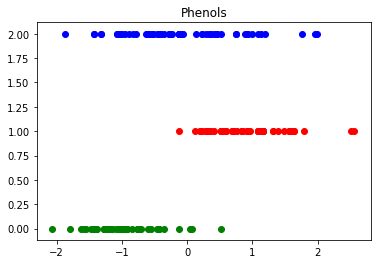

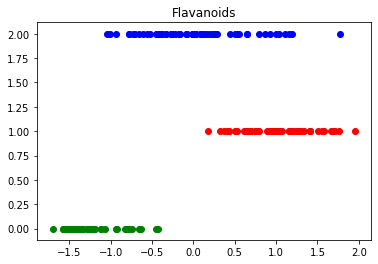

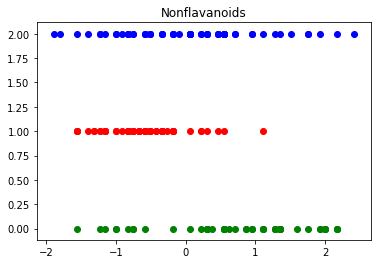

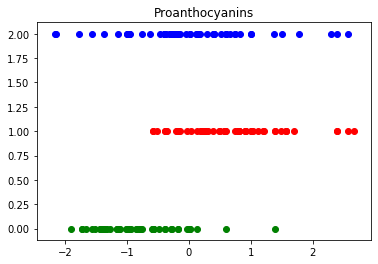

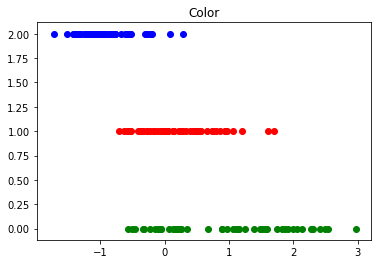

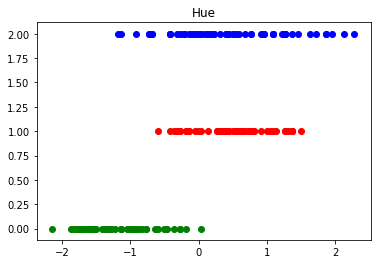

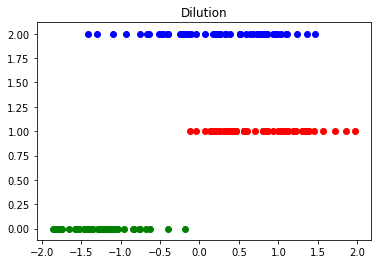

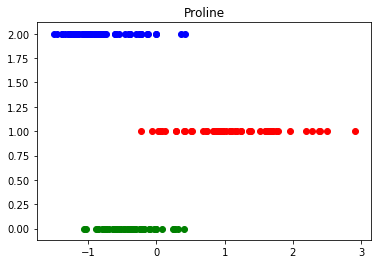

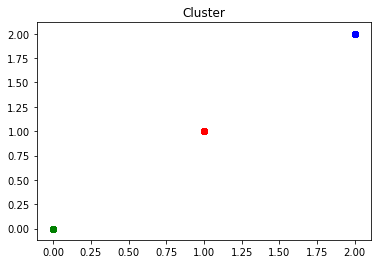

In [58]:
for i in wine:
    plt.scatter(WINE1[i],WINE1['Cluster'],color='green')
    plt.scatter(WINE2[i],WINE2['Cluster'],color='red')
    plt.scatter(WINE3[i],WINE3['Cluster'],color='blue')
    plt.title(i)
    plt.show()

In [59]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,1.513539,-0.578842,0.250637,-1.209653,2.253466,0.840250,1.068668,-0.669081,1.395565,0.233962,0.403766,1.857453,0.980537,1
1,1,0.210929,-0.514888,-0.945351,-2.624711,0.097439,0.600640,0.763248,-0.830933,-0.517348,-0.329398,0.449249,1.127605,0.933414,1
2,1,0.160342,0.015009,1.240421,-0.244840,0.177292,0.840250,1.251920,-0.507230,2.380432,0.251846,0.358284,0.804788,1.357515,1
3,1,1.690593,-0.359574,0.539324,-0.823728,1.135526,2.517517,1.506437,-0.992784,1.187228,1.199721,-0.414920,1.197783,2.284254,1
4,1,0.261516,0.225141,2.065240,0.527010,1.534790,0.840250,0.691983,0.221100,0.505398,-0.356225,0.403766,0.467935,-0.056154,1
